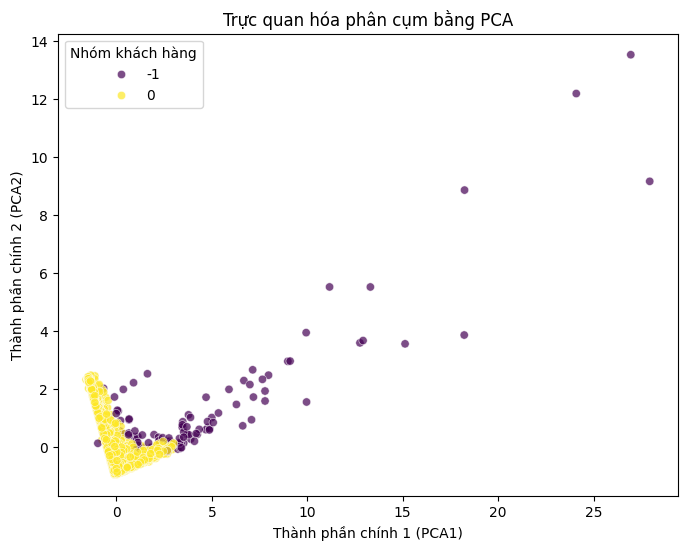

Phân cụm hoàn tất. Kết quả được lưu vào customer_segments_pca.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Đọc dữ liệu
file_path = r"C:\Users\PC\Documents\UEH\KPDL\Online Retail.xlsx"
df = pd.read_excel(file_path, sheet_name="Online Retail")

# Loại bỏ các dòng thiếu CustomerID
df = df.dropna(subset=["CustomerID"])
df["CustomerID"] = df["CustomerID"].astype(int)

# Tạo cột TotalPrice
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

# Xác định ngày cuối cùng trong tập dữ liệu
max_date = df["InvoiceDate"].max()

# Tính Recency
df_recency = df.groupby("CustomerID")["InvoiceDate"].max().reset_index()
df_recency["Recency"] = (max_date - df_recency["InvoiceDate"]).dt.days
df_recency = df_recency[["CustomerID", "Recency"]]

# Tính Frequency
df_frequency = df.groupby("CustomerID")["InvoiceNo"].nunique().reset_index()
df_frequency.columns = ["CustomerID", "Frequency"]

# Tính Monetary
df_monetary = df.groupby("CustomerID")["TotalPrice"].sum().reset_index()
df_monetary.columns = ["CustomerID", "Monetary"]

# Gộp ba bảng lại
rfm_df = df_recency.merge(df_frequency, on="CustomerID").merge(df_monetary, on="CustomerID")

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df[["Recency", "Frequency", "Monetary"]])

# Áp dụng DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(rfm_scaled)
rfm_df["Cluster"] = clusters

# Áp dụng PCA để giảm chiều dữ liệu về 2D
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)
rfm_df["PCA1"] = rfm_pca[:, 0]
rfm_df["PCA2"] = rfm_pca[:, 1]

# Vẽ biểu đồ phân cụm trên không gian 2 chiều
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rfm_df, x="PCA1", y="PCA2", hue="Cluster", palette="viridis", alpha=0.7)
plt.xlabel("Thành phần chính 1 (PCA1)")
plt.ylabel("Thành phần chính 2 (PCA2)")
plt.title("Trực quan hóa phân cụm bằng PCA")
plt.legend(title="Nhóm khách hàng")
plt.show()

# Lưu kết quả phân cụm
rfm_df.to_csv("customer_segments_pca.csv", index=False)
print("Phân cụm hoàn tất. Kết quả được lưu vào customer_segments_pca.csv")
